In [1]:
# Create GAN for independent and identically distributed data

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import secrets


class GAN:
    def __init__(self, P = 0.75, seq_len=100, latent_dim = 100):
        
        self.P = P
        self.seq_len = seq_len
        self.latent_dim = latent_dim
        seed = secrets.randbits(128)
        self.rng = np.random.default_rng(seed)
        self.build_generator()
        self.build_discriminator()
        self.build_gan()
        print(self.P)
    
    def generate_real_samples(self, n_samples):
        X = self.rng.binomial(1, self.P, (n_samples, self.seq_len)) 
        y = np.ones((n_samples, 1)) * 0.9
        return X, y
    
    def generate_fake_samples(self, n_samples):
        X = self.generator.predict(np.random.normal(0, 1, (n_samples, self.latent_dim)))
        y = np.zeros((n_samples, 1))
        return X, y
    
    def calculate_P(self, n_samples):
        X, _ = self.generate_fake_samples(n_samples)
        return np.mean(X)
    
    def build_generator(self):
        self.generator = tf.keras.models.Sequential([
            tf.keras.layers.Dense(25 * 200, input_shape=(self.latent_dim,)),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.Reshape((25, 200)), 
            tf.keras.layers.Conv1DTranspose(100, 3, strides=2, padding='same'),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.Conv1DTranspose(50, 3, strides=2, padding='same'),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.Conv1DTranspose(1, 3, strides=1, padding='same', activation='relu'),
            
        ])
    def summarize_generator(self):
        self.generator.summary()

    def build_discriminator(self):
        self.discriminator = tf.keras.models.Sequential([
            tf.keras.layers.Conv1D(50, 3, strides=2, padding='same', input_shape=(self.seq_len, 1)),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.Conv1D(100, 3, strides=2, padding='same'),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.Conv1D(200, 3, strides=2, padding='same'),
            tf.keras.layers.LeakyReLU(alpha=0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1, activation='sigmoid'),
        ])
        self.discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    def summarize_discriminator(self):
        self.discriminator.summary()
    
    def build_gan(self):
        self.discriminator.trainable = False
        self.gan = tf.keras.models.Sequential([
            self.generator,
            self.discriminator,
        ])
        self.gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam())
        
    def train(self, epochs = 10, batch_size = 128, data_size = 100000):
        l1_hist = []
        l2_hist = []
        l3_hist = []
        ac1_hist = []
        ac2_hist = []
        total = data_size//batch_size
        train_data_x, train_data_y = self.generate_real_samples(data_size)
        for i in range(epochs):
            print("Iteration:", i)
            # Train the discriminator
            
            for k in range(total):
                print(k,"/",total,end="\r")
                idx = np.random.randint(0, data_size, batch_size//2)
                X_real, y_real = train_data_x[idx], train_data_y[idx]
                X_fake, y_fake = self.generate_fake_samples(batch_size//2)
                

                l1, ac1 = self.discriminator.train_on_batch(X_real, y_real)
                l2, ac2 = self.discriminator.train_on_batch(X_fake, y_fake)
                
                X_fake = np.random.normal(0, 1, (batch_size, self.latent_dim))
                y_fake = np.ones((batch_size, 1))
                l3 = self.gan.train_on_batch(X_fake, y_fake)
                
                l1_hist.append(l1)
                l2_hist.append(l2)
                l3_hist.append(l3)
                ac1_hist.append(ac1)
                ac2_hist.append(ac2)
                
            # Show plots of the losses and accuracies
            calc_p = self.calculate_P(100000)
            print(calc_p)
            pred = gan.generator.predict(np.random.normal(0, 1, (1, gan.latent_dim)))
            print(pred)
            print(gan.discriminator.predict(pred))
            print("Loss:",np.mean(np.abs(calc_p - (self.P))))
            if i % 10 >= 0:
                plt.figure(figsize=(10, 10))
                plt.subplot(2, 1, 1)
                plt.plot(l1_hist, label="Discriminator(Real)")
                plt.plot(l2_hist, label="Discriminator(Fake)")
                plt.plot(l3_hist, label="Generator")
                plt.legend()
                plt.title("Losses")
                plt.subplot(2, 1, 2)
                plt.plot(ac1_hist, label="Accuracy(Real)")
                plt.plot(ac2_hist, label="Accuracy(fake)")
                plt.legend()
                plt.title("Accuracies")
                plt.show()
                l1_hist = []
                l2_hist = []
                l3_hist = []
                ac1_hist = []
                ac2_hist = []

2024-02-16 06:40:27.912325: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-16 06:40:29.640659: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/TensorRT-8.4.0.6//lib:/usr/local/cuda-11.6/lib64:/usr/local/apps/python-3.10.2/lib:/usr/local/apps/cuDNN/8.4.0-cuda-11.6/lib
2024-02-16 06:40:29.640849: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: 

In [2]:
gan = GAN()
gan.summarize_generator()
gan.summarize_discriminator()

2024-02-16 06:40:33.350183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-16 06:40:34.051172: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9626 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:83:00.0, compute capability: 7.5


0.75
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5000)              505000    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 5000)              0         
                                                                 
 reshape (Reshape)           (None, 25, 200)           0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 50, 100)          60100     
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 100)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 100, 50)          15050     
 ranspose)                                         

Iteration: 0


2024-02-16 06:40:35.957763: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8400
2024-02-16 06:40:37.869516: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55a8ac2a7060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-16 06:40:37.869569: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-02-16 06:40:37.882072: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-16 06:40:38.039043: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


0.8142706
[[[0.8594359 ]
  [1.1654965 ]
  [0.99375176]
  [1.1656262 ]
  [0.        ]
  [0.9584485 ]
  [0.99960613]
  [0.73437583]
  [1.1028069 ]
  [0.8405961 ]
  [1.0499203 ]
  [1.0962161 ]
  [1.0354104 ]
  [1.03517   ]
  [1.081352  ]
  [0.90470207]
  [1.0965841 ]
  [0.9916718 ]
  [1.197762  ]
  [0.91132635]
  [0.8963681 ]
  [1.0230457 ]
  [1.2114987 ]
  [0.17546609]
  [0.731655  ]
  [1.0138394 ]
  [1.2928166 ]
  [0.58574224]
  [0.36741632]
  [1.0792613 ]
  [0.90262985]
  [0.77255845]
  [1.1514688 ]
  [0.8865682 ]
  [1.2682855 ]
  [0.8225825 ]
  [0.        ]
  [0.88805753]
  [1.0642822 ]
  [0.14792578]
  [1.2304171 ]
  [0.42324042]
  [1.3288778 ]
  [0.52636087]
  [0.3179345 ]
  [1.0762818 ]
  [1.073915  ]
  [0.964219  ]
  [0.9998015 ]
  [1.000785  ]
  [1.0611204 ]
  [1.0964913 ]
  [0.9622627 ]
  [0.82813096]
  [1.0531043 ]
  [0.60879946]
  [0.85017747]
  [1.0433826 ]
  [0.        ]
  [0.6446416 ]
  [1.0442727 ]
  [0.5792872 ]
  [1.2077374 ]
  [0.86488706]
  [0.        ]
  [0.94182974]


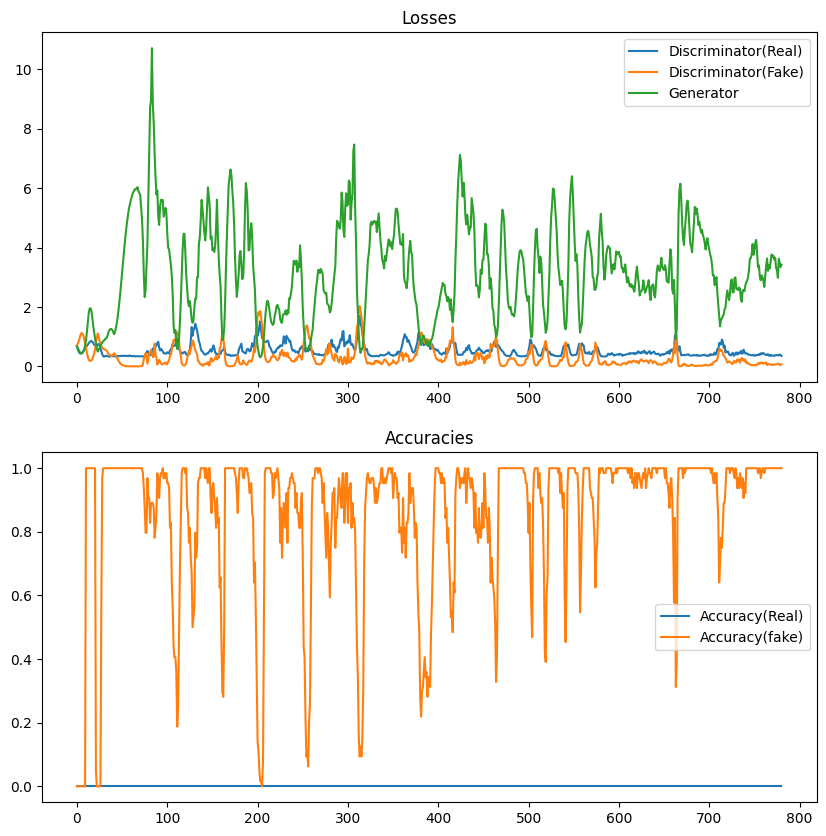

Iteration: 1
0.8678577
[[[1.056064  ]
  [1.0296737 ]
  [1.0205964 ]
  [0.9745125 ]
  [0.        ]
  [0.9850498 ]
  [0.        ]
  [0.9983055 ]
  [1.0114743 ]
  [0.99191684]
  [0.9854542 ]
  [1.0078207 ]
  [0.        ]
  [1.0025393 ]
  [0.        ]
  [0.939714  ]
  [0.        ]
  [0.97907543]
  [0.        ]
  [0.93563455]
  [0.        ]
  [1.0506754 ]
  [1.0395193 ]
  [0.9955527 ]
  [0.99360585]
  [0.9922598 ]
  [0.9861696 ]
  [0.98752487]
  [0.9970339 ]
  [0.99132437]
  [0.9962893 ]
  [1.0139621 ]
  [1.0040003 ]
  [0.9877846 ]
  [0.9913477 ]
  [0.95010877]
  [0.        ]
  [0.97878057]
  [1.0123379 ]
  [0.97337335]
  [0.        ]
  [0.9822624 ]
  [1.0052892 ]
  [0.9204411 ]
  [0.        ]
  [1.015401  ]
  [0.44059503]
  [0.9841102 ]
  [0.35434687]
  [0.9681571 ]
  [0.        ]
  [0.9605841 ]
  [0.13560084]
  [0.98839283]
  [1.0043852 ]
  [0.991252  ]
  [1.0094955 ]
  [0.97093284]
  [0.        ]
  [0.9722145 ]
  [1.0043535 ]
  [1.0116853 ]
  [0.4391665 ]
  [1.0211875 ]
  [1.0141381 ]
  

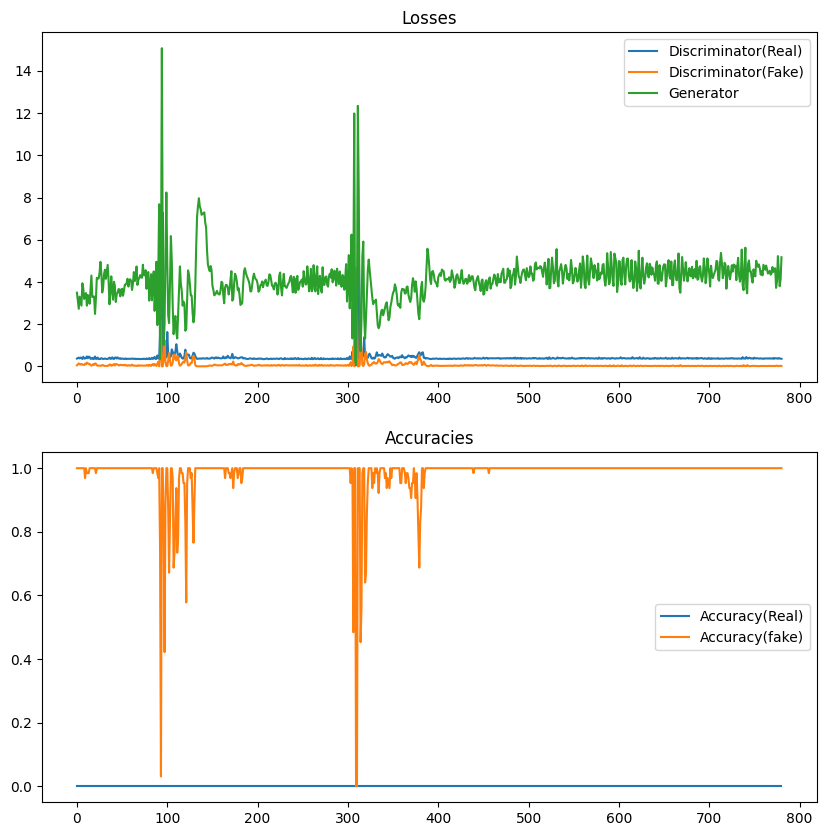

Iteration: 2
0.8747381
[[[1.0529523 ]
  [1.0230927 ]
  [0.        ]
  [0.9978854 ]
  [0.        ]
  [0.97291595]
  [0.        ]
  [0.92976564]
  [1.0027897 ]
  [0.9743692 ]
  [1.0051801 ]
  [0.9773772 ]
  [0.        ]
  [0.98141116]
  [1.0040734 ]
  [1.0221603 ]
  [1.0156959 ]
  [0.9990298 ]
  [0.97458977]
  [1.0040934 ]
  [0.9965889 ]
  [0.98955876]
  [0.9975902 ]
  [0.997782  ]
  [0.9982902 ]
  [1.0003387 ]
  [0.99948674]
  [1.0060694 ]
  [1.0145452 ]
  [0.9922157 ]
  [0.9972685 ]
  [0.9992712 ]
  [0.9998751 ]
  [0.9902679 ]
  [0.9974304 ]
  [1.0245557 ]
  [1.011896  ]
  [0.9976265 ]
  [0.        ]
  [0.9861021 ]
  [0.        ]
  [1.0130198 ]
  [1.0112923 ]
  [1.0082965 ]
  [0.        ]
  [0.99228203]
  [1.0036618 ]
  [1.0049018 ]
  [1.0061095 ]
  [0.9912522 ]
  [1.0003488 ]
  [1.0053427 ]
  [0.9989854 ]
  [1.0030682 ]
  [1.0158194 ]
  [0.9826171 ]
  [0.        ]
  [0.9186048 ]
  [0.        ]
  [0.98140883]
  [1.0158077 ]
  [1.0099719 ]
  [0.        ]
  [0.98509383]
  [1.0009986 ]
  

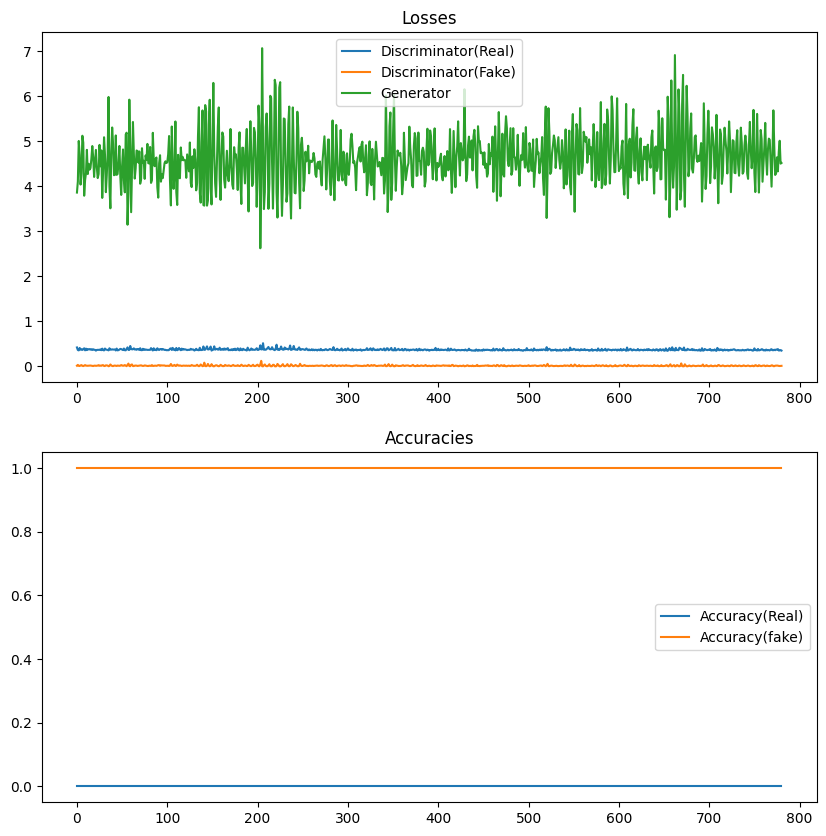

Iteration: 3
0.8753021
[[[0.9976671 ]
  [1.0025724 ]
  [0.        ]
  [0.9978001 ]
  [1.0010362 ]
  [0.99892974]
  [0.        ]
  [0.97971344]
  [0.        ]
  [0.9996253 ]
  [1.0487678 ]
  [0.98379695]
  [0.        ]
  [0.9550389 ]
  [0.9738294 ]
  [1.0076051 ]
  [1.007141  ]
  [0.99328256]
  [0.99274945]
  [0.9944887 ]
  [0.9962505 ]
  [0.98361266]
  [0.99103   ]
  [0.9935304 ]
  [0.99558246]
  [0.99354255]
  [0.99405885]
  [0.9969487 ]
  [0.66203713]
  [1.0067397 ]
  [0.        ]
  [1.0030464 ]
  [0.9974928 ]
  [0.9877727 ]
  [0.99039066]
  [0.99425566]
  [0.99665844]
  [0.98131776]
  [0.99127865]
  [0.99578726]
  [0.99660015]
  [0.9855931 ]
  [0.9908477 ]
  [0.97705626]
  [1.0069624 ]
  [0.98854697]
  [0.        ]
  [0.9611895 ]
  [0.        ]
  [0.99138224]
  [0.        ]
  [0.9913131 ]
  [0.        ]
  [0.9913113 ]
  [1.0065467 ]
  [0.9933659 ]
  [0.99649286]
  [0.9943174 ]
  [0.        ]
  [0.99423766]
  [1.0033281 ]
  [1.0031997 ]
  [1.0012393 ]
  [1.0003366 ]
  [0.9985024 ]
  

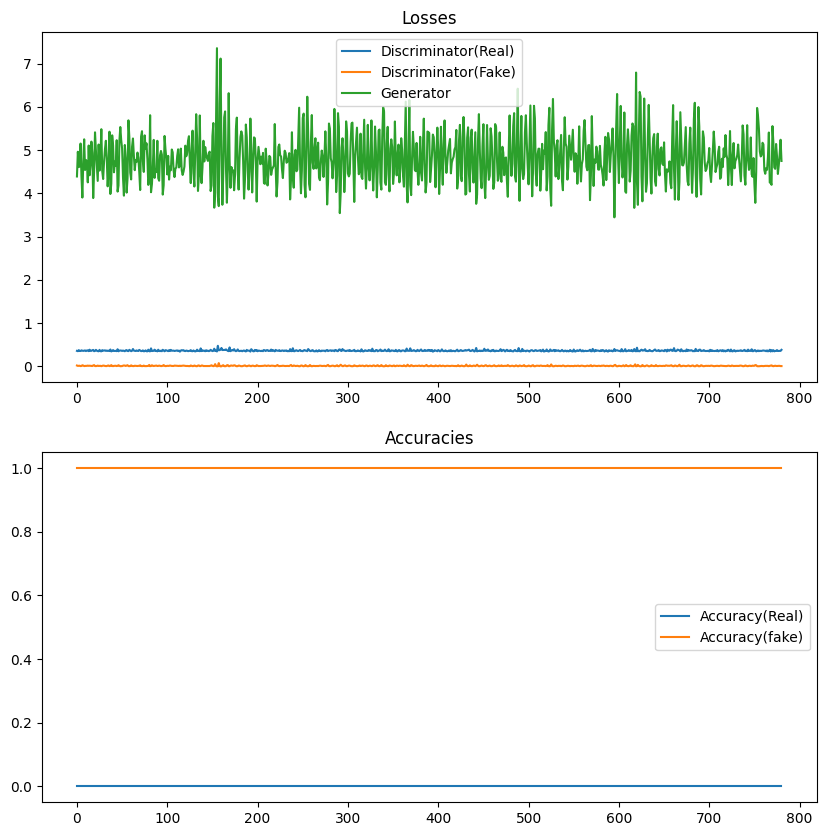

Iteration: 4
0.8708359
[[[1.0125637 ]
  [1.0147219 ]
  [0.9959956 ]
  [0.99304503]
  [0.        ]
  [0.9917669 ]
  [0.        ]
  [1.0286963 ]
  [0.        ]
  [1.0163088 ]
  [0.9909649 ]
  [0.9949651 ]
  [1.0104697 ]
  [1.0086579 ]
  [1.0023752 ]
  [0.9928863 ]
  [0.        ]
  [1.0134959 ]
  [0.9606924 ]
  [0.9740113 ]
  [0.99438083]
  [1.0008494 ]
  [0.95725733]
  [0.9378313 ]
  [0.        ]
  [1.0480905 ]
  [0.9630286 ]
  [1.0025761 ]
  [1.0044858 ]
  [1.0095943 ]
  [0.9918623 ]
  [0.9776708 ]
  [0.        ]
  [1.0131227 ]
  [0.        ]
  [1.0071529 ]
  [1.0057335 ]
  [0.9953226 ]
  [1.0008311 ]
  [0.99243623]
  [0.9335438 ]
  [0.9936598 ]
  [0.        ]
  [1.0124412 ]
  [1.0044591 ]
  [1.000814  ]
  [1.0000972 ]
  [1.0060654 ]
  [1.0094002 ]
  [1.0019615 ]
  [0.99691546]
  [0.99023134]
  [0.        ]
  [0.9977182 ]
  [0.        ]
  [1.0027223 ]
  [0.        ]
  [1.014806  ]
  [0.9982671 ]
  [0.9951314 ]
  [0.99263537]
  [0.9668286 ]
  [0.        ]
  [1.0031958 ]
  [1.0020385 ]
  

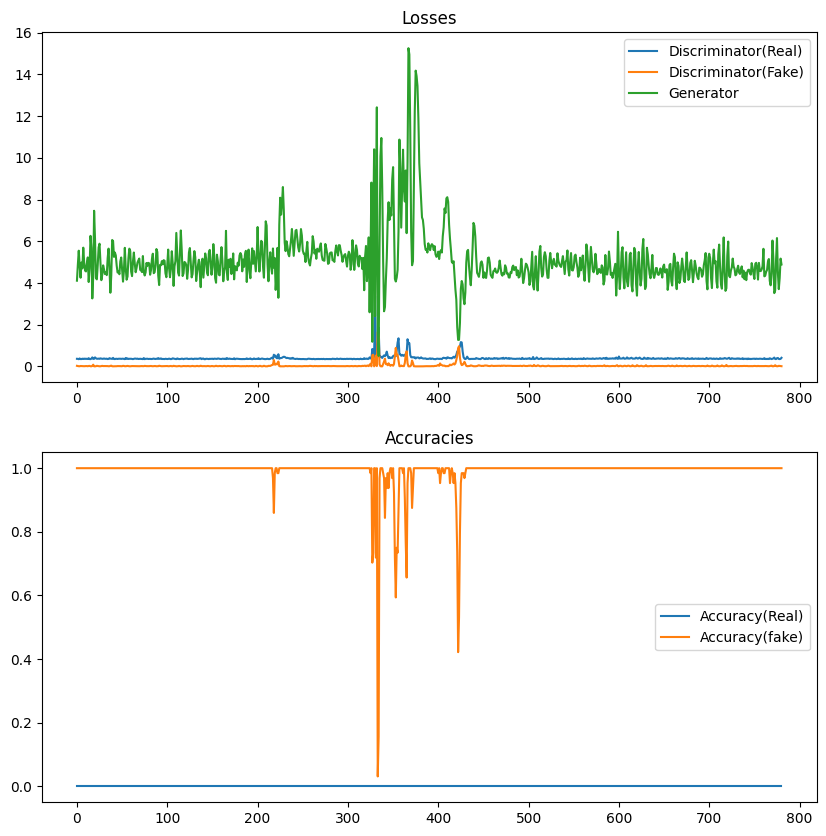

Iteration: 5
0.8852029
[[[0.986562  ]
  [1.0171882 ]
  [1.0012014 ]
  [1.016043  ]
  [1.0108037 ]
  [1.0346898 ]
  [1.0136017 ]
  [1.0267807 ]
  [0.5386467 ]
  [1.024043  ]
  [1.0154203 ]
  [1.0065752 ]
  [1.0032502 ]
  [0.95362496]
  [0.        ]
  [0.9714743 ]
  [0.        ]
  [1.0156974 ]
  [0.        ]
  [0.9978937 ]
  [1.0098817 ]
  [1.0109118 ]
  [1.0122238 ]
  [1.0154858 ]
  [1.0089549 ]
  [1.0266757 ]
  [1.0171096 ]
  [0.98740876]
  [0.        ]
  [1.0125216 ]
  [1.0188969 ]
  [0.9450315 ]
  [0.        ]
  [0.96983254]
  [0.9944824 ]
  [0.995451  ]
  [0.99890316]
  [0.9809247 ]
  [0.        ]
  [0.99400496]
  [1.0077915 ]
  [1.0180476 ]
  [1.0150013 ]
  [0.9932296 ]
  [0.        ]
  [1.0160592 ]
  [1.0153475 ]
  [1.0142144 ]
  [1.0013956 ]
  [1.0217671 ]
  [1.0216318 ]
  [0.97608685]
  [0.        ]
  [0.9862325 ]
  [1.0021616 ]
  [0.9851959 ]
  [0.        ]
  [0.9787744 ]
  [0.9804784 ]
  [0.99013567]
  [1.0052376 ]
  [0.99478483]
  [0.        ]
  [0.99863935]
  [1.0101342 ]
  

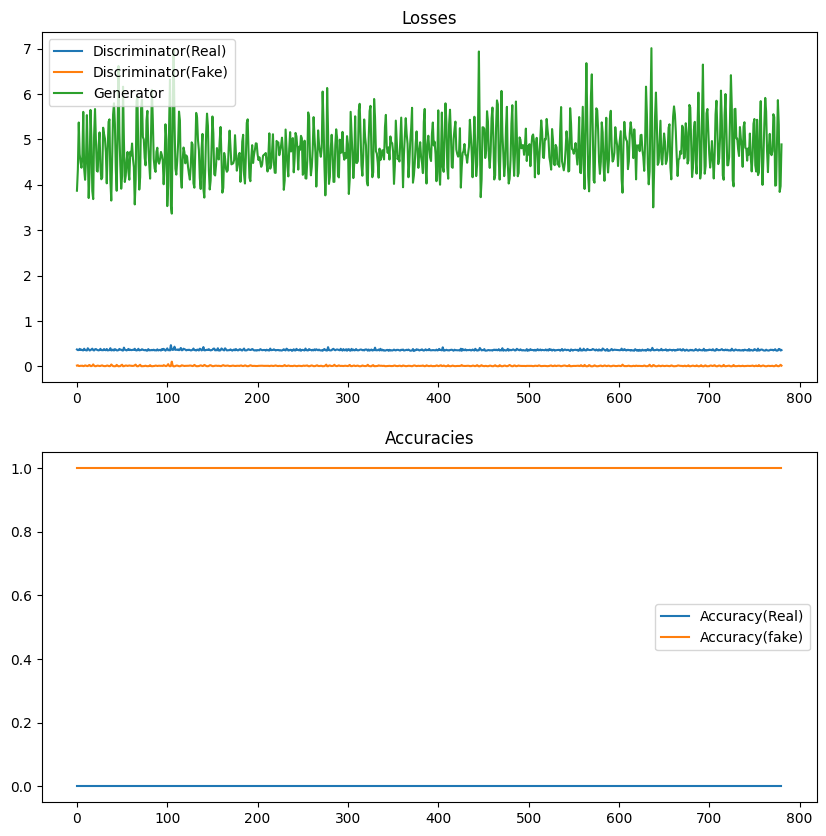

Iteration: 6
0.8618323
[[[0.93514943]
  [0.99467087]
  [0.        ]
  [0.9786364 ]
  [0.        ]
  [1.0053644 ]
  [1.0592567 ]
  [0.978418  ]
  [0.9947728 ]
  [0.9703059 ]
  [1.0520493 ]
  [0.98035717]
  [1.0132594 ]
  [0.9742609 ]
  [1.0095372 ]
  [0.9636755 ]
  [1.0511146 ]
  [0.96758974]
  [1.0200746 ]
  [0.9753957 ]
  [1.0611774 ]
  [0.9923816 ]
  [1.041502  ]
  [0.95272255]
  [0.        ]
  [1.0282302 ]
  [0.        ]
  [0.97649837]
  [1.0058241 ]
  [1.0332452 ]
  [0.        ]
  [0.9722048 ]
  [0.        ]
  [1.0311296 ]
  [0.        ]
  [0.9683374 ]
  [0.99548626]
  [1.0069813 ]
  [0.        ]
  [0.9759984 ]
  [1.0521965 ]
  [0.98951125]
  [1.0365758 ]
  [0.9831896 ]
  [1.0572752 ]
  [1.0150374 ]
  [1.1409559 ]
  [0.99050844]
  [1.059546  ]
  [0.9913173 ]
  [1.0218787 ]
  [0.9782567 ]
  [1.0184261 ]
  [0.9759306 ]
  [0.99345815]
  [0.9823086 ]
  [0.        ]
  [0.9846597 ]
  [1.0171517 ]
  [0.9668567 ]
  [1.0257825 ]
  [0.9986093 ]
  [1.0305914 ]
  [0.9793917 ]
  [0.        ]
  

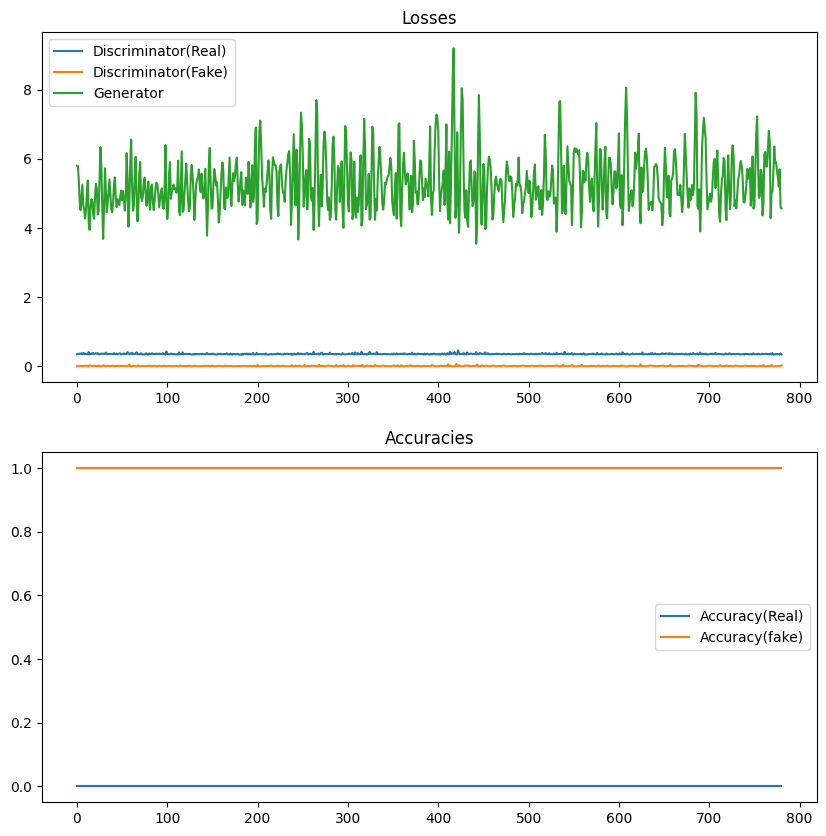

Iteration: 7
0.8266294
[[[0.91332734]
  [1.0423387 ]
  [1.0133185 ]
  [0.99052656]
  [0.        ]
  [0.99756134]
  [1.0000308 ]
  [0.99109626]
  [1.0125957 ]
  [1.0117466 ]
  [1.0200827 ]
  [0.9866221 ]
  [0.99761534]
  [0.99608195]
  [0.        ]
  [1.0332981 ]
  [0.        ]
  [0.9931983 ]
  [1.0052898 ]
  [0.9783473 ]
  [0.        ]
  [1.0357413 ]
  [0.9526384 ]
  [1.0075599 ]
  [0.        ]
  [1.0042597 ]
  [1.0040194 ]
  [0.9482813 ]
  [0.9730239 ]
  [0.        ]
  [0.98304605]
  [0.977039  ]
  [1.0019768 ]
  [0.        ]
  [0.99426854]
  [0.97721326]
  [1.0081221 ]
  [0.        ]
  [0.98082554]
  [1.0005211 ]
  [1.0107244 ]
  [1.0306486 ]
  [1.0151832 ]
  [0.9820839 ]
  [1.0043647 ]
  [0.        ]
  [0.98467016]
  [1.0011474 ]
  [1.0082184 ]
  [0.9899858 ]
  [0.        ]
  [1.0129275 ]
  [0.9957427 ]
  [1.0095403 ]
  [1.0059044 ]
  [0.9364997 ]
  [0.99431694]
  [0.        ]
  [0.9871502 ]
  [0.99712706]
  [0.6808915 ]
  [1.0114758 ]
  [0.9922575 ]
  [0.98068655]
  [0.9955491 ]
  

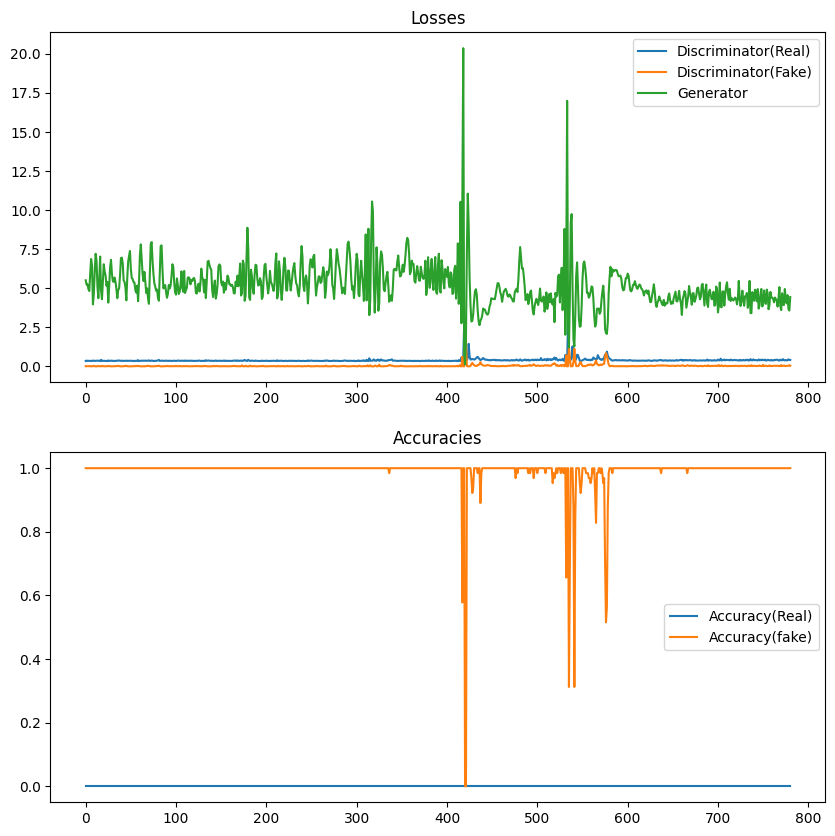

Iteration: 8
0.7747766
[[[1.0994964 ]
  [1.0453216 ]
  [1.0783883 ]
  [1.0451599 ]
  [1.0658977 ]
  [1.0379906 ]
  [1.0318906 ]
  [0.7266439 ]
  [1.0500948 ]
  [0.        ]
  [1.0043703 ]
  [0.        ]
  [0.        ]
  [1.0482745 ]
  [0.        ]
  [1.0059297 ]
  [1.0776191 ]
  [0.        ]
  [1.0448946 ]
  [1.0777105 ]
  [1.1282347 ]
  [1.1293001 ]
  [1.0877986 ]
  [1.0577241 ]
  [1.0848179 ]
  [1.0531814 ]
  [1.0505155 ]
  [1.0095335 ]
  [0.        ]
  [0.99632764]
  [1.0201657 ]
  [0.        ]
  [1.0576252 ]
  [1.0350386 ]
  [1.0490255 ]
  [0.        ]
  [1.0498942 ]
  [1.0642145 ]
  [1.0596648 ]
  [1.0437772 ]
  [1.0548781 ]
  [1.01562   ]
  [0.        ]
  [0.9157007 ]
  [0.        ]
  [0.9814937 ]
  [1.0210963 ]
  [0.        ]
  [0.9929271 ]
  [0.        ]
  [0.9606061 ]
  [0.5379857 ]
  [1.047565  ]
  [1.0331668 ]
  [1.0493172 ]
  [1.0075586 ]
  [1.0542192 ]
  [1.0460781 ]
  [1.0438874 ]
  [1.027204  ]
  [1.0642653 ]
  [1.0310802 ]
  [1.0420375 ]
  [1.0231481 ]
  [1.0431926 ]
  

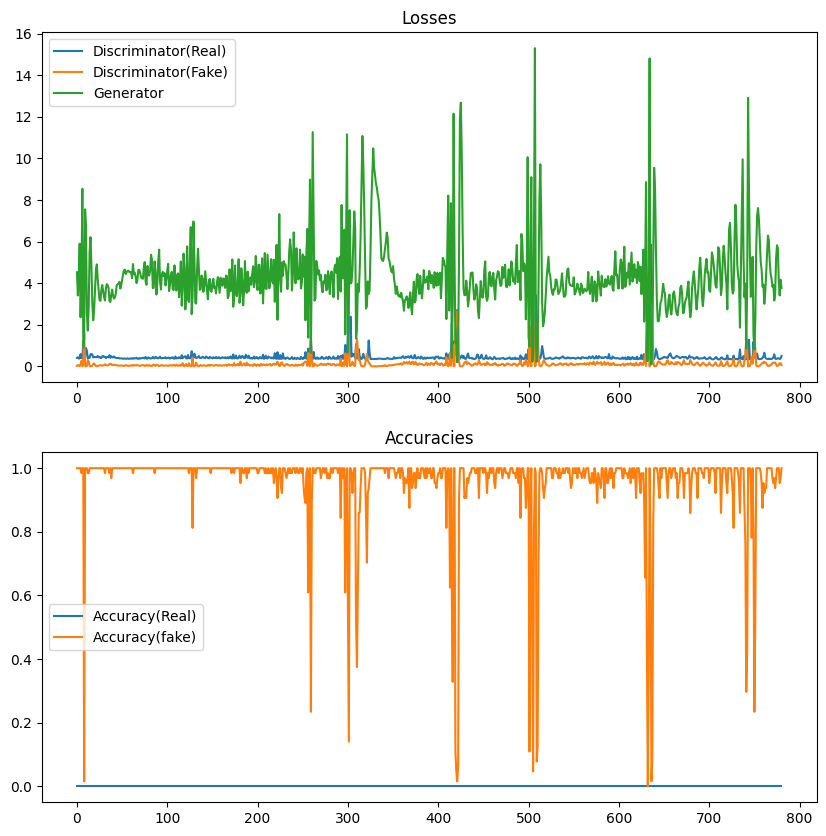

Iteration: 9
0.7118264
[[[0.        ]
  [0.9414972 ]
  [1.0007087 ]
  [0.        ]
  [0.98742056]
  [0.94567424]
  [0.98907983]
  [0.        ]
  [0.        ]
  [0.97860706]
  [0.972206  ]
  [0.96367073]
  [0.9679798 ]
  [0.9856603 ]
  [0.        ]
  [0.97488475]
  [0.975474  ]
  [0.        ]
  [1.0810918 ]
  [0.        ]
  [1.0440135 ]
  [0.9653113 ]
  [0.        ]
  [0.98156154]
  [0.        ]
  [0.9778676 ]
  [0.9842279 ]
  [0.9618423 ]
  [0.9663764 ]
  [0.9582815 ]
  [0.9451934 ]
  [0.9512482 ]
  [0.9475167 ]
  [0.98475623]
  [0.        ]
  [0.        ]
  [0.9911591 ]
  [0.90001214]
  [0.956219  ]
  [0.97532606]
  [0.        ]
  [0.        ]
  [0.9680315 ]
  [0.9635093 ]
  [0.93337035]
  [0.93379617]
  [0.9631314 ]
  [0.        ]
  [0.98132753]
  [0.95715207]
  [0.951144  ]
  [1.0031983 ]
  [0.        ]
  [1.0140319 ]
  [0.        ]
  [0.97945094]
  [0.9515499 ]
  [0.93716305]
  [0.93982446]
  [0.962888  ]
  [0.98964167]
  [0.        ]
  [0.9618069 ]
  [0.94751406]
  [0.9078175 ]
  

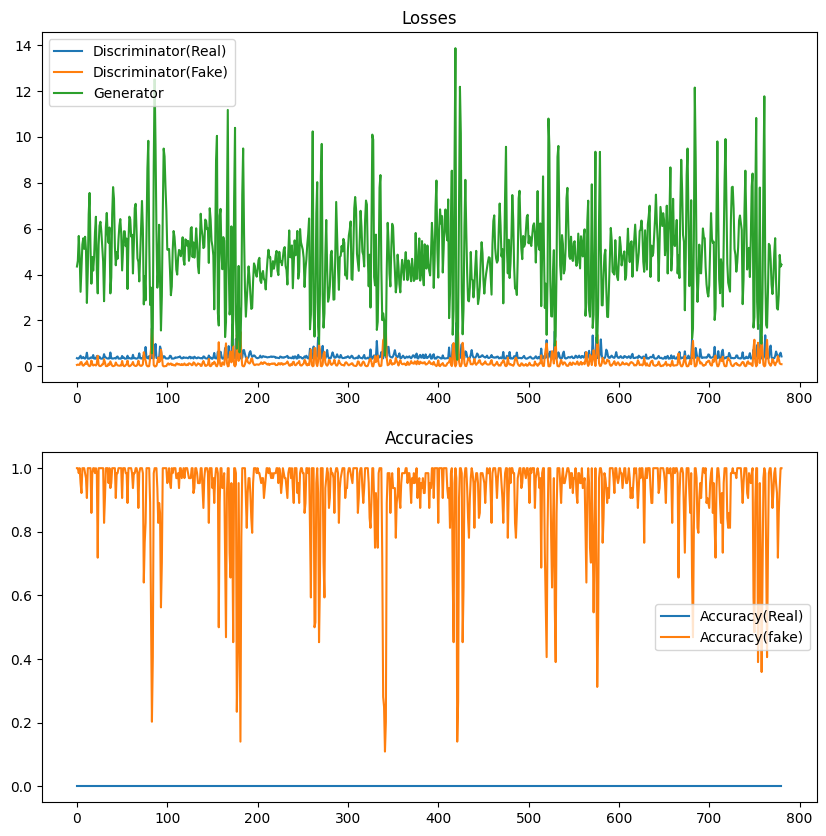

In [3]:
tf.keras.utils.disable_interactive_logging()
gan.train(10)

In [7]:
print((gan.generator.predict(np.random.normal(0, 1, (10, gan.latent_dim)))))
print((gan.generate_real_samples(1)[0]))

[[[0.        ]
  [0.9753009 ]
  [1.0463803 ]
  [0.        ]
  [0.9931327 ]
  [0.97199225]
  [0.        ]
  [0.9766525 ]
  [0.94809824]
  [0.97546756]
  [0.        ]
  [0.97600996]
  [0.9496224 ]
  [0.9365348 ]
  [0.94507134]
  [0.        ]
  [0.97602665]
  [0.9503952 ]
  [0.95187795]
  [0.27476525]
  [0.        ]
  [0.        ]
  [0.9890548 ]
  [0.96376586]
  [0.        ]
  [0.98482203]
  [0.        ]
  [0.        ]
  [0.95682895]
  [0.9580716 ]
  [0.9452584 ]
  [0.9747013 ]
  [0.95896983]
  [0.        ]
  [0.        ]
  [0.        ]
  [1.0674342 ]
  [0.94396245]
  [0.9760388 ]
  [0.        ]
  [1.0072819 ]
  [0.        ]
  [1.0357188 ]
  [0.        ]
  [0.        ]
  [0.9578569 ]
  [0.9508215 ]
  [0.96587086]
  [0.94738185]
  [0.9910128 ]
  [0.        ]
  [1.002364  ]
  [0.9956809 ]
  [0.94971246]
  [0.96394634]
  [0.96005857]
  [0.9784441 ]
  [0.        ]
  [0.9576956 ]
  [0.95479107]
  [0.9475759 ]
  [0.95374477]
  [0.9421909 ]
  [0.96289086]
  [0.94331604]
  [0.98396385]
  [0.     

In [8]:
x = gan.generator.predict(np.random.normal(0, 1, (10000, gan.latent_dim))).flatten()
y = np.ones(x.shape)
print(x.min(),x.max(), x.mean())
fig = plt.figure(figsize=(100, 100))
ax = fig.subplots()
vals = ax.hist(x, bins=1000, alpha=0.5, label="Generated", range=(-0.5,1.5))
ax.set_xlim([-0.5,1.5])
ax.set_ylim([0, vals[0].max() + 10000])
ax.set_xticks(np.arange(-0.5, 1.5, (1.5+0.5)/100))   
fig.show()

0.0 1.2226411 0.7117586


In [6]:
print(gan.calculate_P(1000))

0.7119712
